# Level 0

In [ ]:
import numpy as np

In [268]:
def make_matrix(matrix_type):
    rng = np.random.default_rng()
    
    while True:
        src = (20 * rng.random((3,3)) - 10).astype(int)
        
        if matrix_type == 'diag_orth':
            diag = np.diag(src)
            if np.array_equal(diag.dot(diag.T),np.eye(3)) and not np.array_equal(diag, np.eye(3)):
                return diag
        
        if matrix_type == 'triu_orth':
            triu = np.triu(src)
            if np.array_equal(triu.dot(triu.T),np.eye(3)):
                return triu
            
        if matrix_type == 'tril_orth':
            tril = np.tril(src)
            if np.array_equal(tril.dot(tril.T),np.eye(3)):
                return tril
            
        if matrix_type == 'det_one' and np.linalg.det(src) == 1 and src.all():
            return src
    
make_matrix('det_one')

array([[-1, -4, -2],
       [ 1, -3, -4],
       [-2,  7,  9]])

In [269]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [277]:
l, A = np.linalg.eig(m)
for i in range(len(l)):
    print('Собственное значение:', l[i])
    print('Собственный вектор:', A[:,i],'\n')

Собственное значение: 1.0
Собственный вектор: [-0.89442719  0.4472136 ] 

Собственное значение: 4.0
Собственный вектор: [-0.70710678 -0.70710678] 



# Level 1

## Ex 1

In [219]:
m = np.array([[1, 2],
              [2, 3]])
print(m)

[[1 2]
 [2 3]]


In [220]:
a, U = np.linalg.eig(m)
print('Eigenvalues')
print(a)
print('\nEigenvectors')
print(U)

Eigenvalues
[-0.23606798  4.23606798]

Eigenvectors
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [221]:
A = U @ np.diag(a) @ U.T
print(A)

[[1. 2.]
 [2. 3.]]


## Ex 2

In [222]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE

In [223]:
digits = load_digits()

def get_mse(components):
    pca = PCA(n_components=components)
    
    errors = []
    for image in digits.images:
        pred = pca.inverse_transform(pca.fit_transform(image))
        errors.append(MSE(image, pred))
        
    return np.asarray(errors, dtype=float).mean()

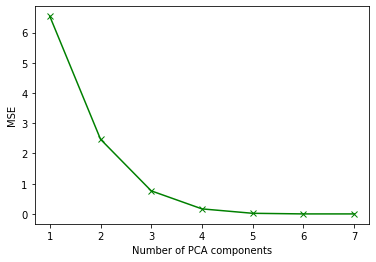

In [224]:
plt.plot([i for i in range(1,8)],[get_mse(i) for i in range(1,8)], 'x-g')
plt.ylabel('MSE')
plt.xlabel('Number of PCA components')
plt.show()